In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv("C:/Users/karth/OneDrive/Desktop/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#basic info about dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


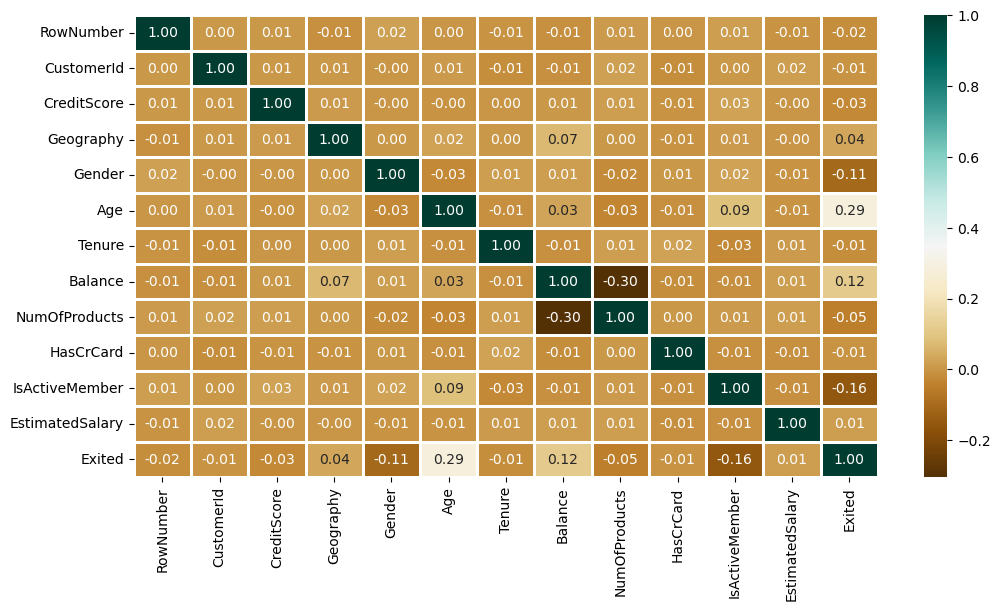

In [45]:
plt.figure(figsize=(12,6)) 
numeric_dataset = dataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_dataset.corr(), cmap='BrBG',fmt='.2f', linewidths=2, annot=True)
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_8652\3101174591.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, index)
C:\Users\karth\AppData\Local\Temp\ipykernel_8652\3101174591.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])
C:\Users\karth\AppData\Local\Temp\ipykernel_8652\3101174591.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

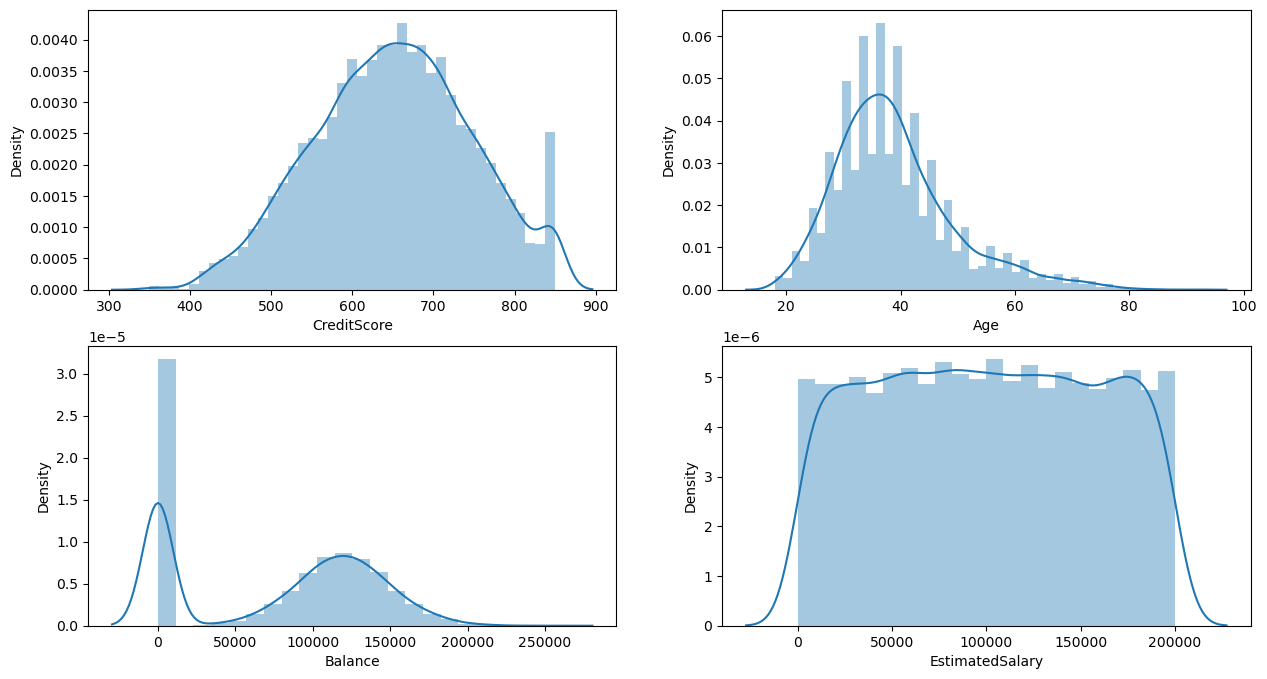

In [47]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
plt.subplots(figsize=(15, 8)) 
index = 1
  
for i in lis: 
    plt.subplot(2, 2, index) 
    sns.distplot(dataset[i]) 
    index += 1


In [17]:
dataset.isnull().any() 

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [27]:
dataset["Geography"].fillna(dataset["Geography"].mode()[0],inplace = True) 
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace = True) 
dataset["Age"].fillna(dataset["Age"].mean(),inplace = True)


In [29]:
dataset.isnull().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [31]:
le = LabelEncoder() 
dataset['Geography'] = le.fit_transform(dataset["Geography"]) 
dataset['Gender'] = le.fit_transform(dataset["Gender"]) 


In [33]:
x = dataset.iloc[:,3:13].values 
y = dataset.iloc[:,13:14].values


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = 0.2,  
                                                    random_state = 0)


In [37]:
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)


In [39]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 


In [41]:
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test) 
    print("Accuracy score of ",clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(y_test, y_pred))


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy score of  RandomForestClassifier = 84.5


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  KNeighborsClassifier = 82.45


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 86.15
Accuracy score of  LogisticRegression = 80.75


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
